In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline

# Necessary packages 

```{shell}
conda install -c conda-forge pygrib

conda install -c anaconda basemap 

conda install -c conda-forge cvxopt

source activate
pip install ecmwf-api-client

```

# Loading data from ECMWF server to local computer 

See [here](https://confluence.ecmwf.int//display/WEBAPI/Access+ECMWF+Public+Datasets) for how to register to ECMWF to use their api.

```python
>>> from volatilitytrend.data_utils.ecmwf_dataUtils import loadGribFilesFromServer
>>> loadGribFilesFromServer('era20c','1960-01-01','2010-12-24')
```

# Preprocessing 

Run the script `preProcessing.py`.

# Visualization 

## Plotting time series of several locations 

In [2]:
from volatilitytrend.algorithms.base import LinearizedADMM
from volatilitytrend.utils import latlon_to_rowcol
la = LinearizedADMM()
la.loadData('1960-01-01_to_2010-12-31_data','1960-01-01_to_2010-12-31_metadata')

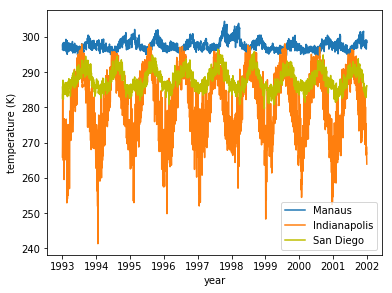

In [3]:
start_date = '1993-01-01'
end_date = '2002-01-01'

lat1,lon1=(-3.1,-60.6)#Manaus,Brazil
lat2,lon2=(39.77,-86.15)#Indianapolis
lat3,lon3=(32.7,-117.6)#San Diego
#lat3,lon3=(40.44,-79.99)#Pittsburgh

lats,lons = la.metadata['lats'],la.metadata['lons']
n_rows,n_cols = la.metadata['n_rows'],la.metadata['n_cols']
dates = pd.to_datetime(la.metadata['dates'])
idx = (dates>=start_date) & (dates<=end_date)

_,_,i1=latlon_to_rowcol(lat1,lon1,lats,lons,n_rows,n_cols)
_,_,i2=latlon_to_rowcol(lat2,lon2,lats,lons,n_rows,n_cols)
_,_,i3=latlon_to_rowcol(lat3,lon3,lats,lons,n_rows,n_cols)

fig = plt.figure(figsize=(6,4.5))
plt.plot(dates[idx],la.dataMat[i1,idx])
plt.plot(dates[idx],la.dataMat[i2,idx])
plt.plot(dates[idx],la.dataMat[i3,idx],'y')
plt.legend(['Manaus','Indianapolis','San Diego'],loc=4)
plt.xlabel('year');plt.ylabel('temperature (K)');
fig.savefig('../aaai-2018/Figures/cities_ts.pdf',dpi=300,format='pdf')

## Figure 3

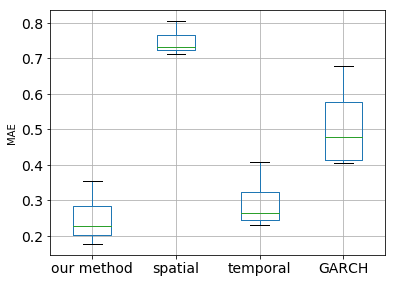

In [12]:
errors = pd.read_csv('/home/arash/MEGA/MEGAsync/Projects/Cloud/Data/Simulated data/modelComp_MAE.csv')
fig = plt.figure(figsize=(6,4.5))
errors.columns = ['our method','spatial','temporal','GARCH']
errors.boxplot();
plt.ylabel('MAE');
plt.xticks(size=14);plt.yticks(size=14);
fig.savefig('../aaai-2018/Figures/modelComp_MAE.pdf',dpi=300,format='pdf')

# Figure 5 